## Reading the Image

In [1]:
import cv2
import numpy as np

image_path = "car.jpg" 

# image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# cv2.imshow("image", image )
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Multi-Thresholding implementation (Sci-kit)

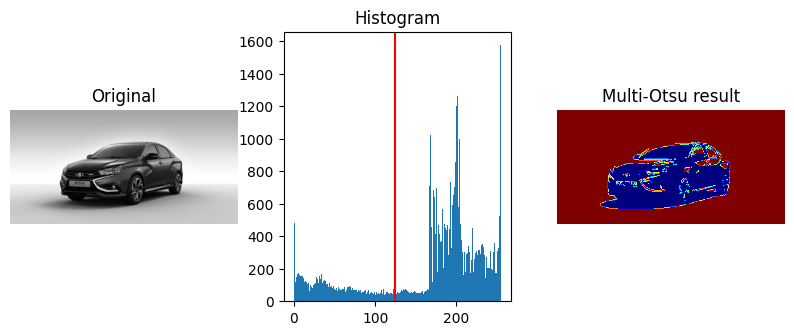

In [3]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_multiotsu
# Applying multi-otsu threshold for the dfault value, generating three classes

# image = data.camera()
# image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

thresholds = threshold_multiotsu(image, 2)
regions = np.digitize(image, bins = thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image

ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original")
ax[0].axis("off")

# Plotting the histogram and the two thresholds obtained from multi-otsu

ax[1].hist(image.ravel(), bins=255)
ax[1].set_title("Histogram")
for threshold in thresholds:
    ax[1].axvline(threshold, color="r")
    
    
# Plotting the multi-otsu result
ax[2].imshow(regions, cmap="jet")
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()
plt.show()

## Multi-Otsu Thresholding Implementation (Own)

In [22]:
# Compute the normalized histogram
def get_histogram(image, bins = 256):
    histogram, _ = np.histogram(image, bins=bins, range=(0, 255))
    return histogram / np.sum(histogram)

def otsu_variance(histogram, total_mean):
    weights = np.cumsum(histogram)

    means = np.cumsum(histogram * np.arange(len(histogram)))

    



def multi_otsu_threshold(image, num_thresholds = 3):
    histogram = get_histogram(image)    
    total_mean = np.sum(histogram * np.arange(len(histogram)))
    
    valid_range = np.arange(1, len(histogram) - 1)
    
    best_thresholds = []
    
    for _ in range(num_thresholds):
        class_variances = otsu_variance(histogram, total_mean)
        best_threshold = np.argmax(class_variances[valid_range])
        best_thresholds.append(best_threshold + 1)
        histogram[:best_threshold + 1 ] = 0
        total_mean = np.sum(histogram * np.arange(len(histogram)))
        
    return sorted(best_thresholds)    


def apply_thresholds(image, thresholds):
    return np.digitize(image, bins = thresholds)


In [23]:
threholds = multi_otsu_threshold(image, 3)

regions_gpt = apply_thresholds(image, threholds)



# Display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Original image
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Histogram with thresholds
hist = get_histogram(image)
ax[1].plot(hist)
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')
ax[1].set_title('Histogram with Thresholds')
ax[1].set_xlabel('Pixel Intensity')
ax[1].set_ylabel('Normalized Frequency')

# Segmented regions_GPT 1
ax[2].imshow(regions_gpt, cmap='jet')
ax[2].set_title('Segmented Regions')
ax[2].axis('off')



plt.tight_layout()
plt.show()

IndexError: index 255 is out of bounds for axis 0 with size 255

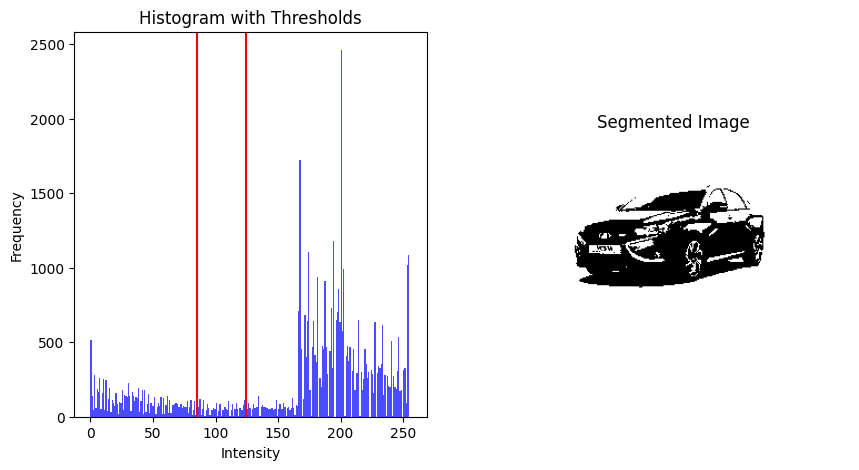

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def multi_otsu_threshold(image, classes):
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256])
    hist = hist.astype(float) / np.sum(hist)  # Normalize histogram

    thresholds = np.zeros(classes - 1)
    variances = np.zeros(classes - 1)

    for k in range(1, classes):
        threshold = 0
        max_variance = 0
        for t in range(1, len(hist)):
            p1 = np.sum(hist[:t])
            p2 = np.sum(hist[t:])
            if p1 == 0 or p2 == 0:
                continue
            mean1 = np.sum(hist[:t] * np.arange(0, t)) / p1
            mean2 = np.sum(hist[t:] * np.arange(t, len(hist))) / p2
            variance = p1 * p2 * ((mean1 - mean2) ** 2)
            if variance > max_variance:
                max_variance = variance
                threshold = t
        thresholds[k - 1] = threshold
        variances[k - 1] = max_variance

        hist = hist[threshold:]

    return thresholds.astype(int)

def apply_thresholds(image, thresholds):
    segmented_image = np.zeros_like(image)
    for i in range(len(thresholds) + 1):
        if i == 0:
            segmented_image[image <= thresholds[i]] = i
        elif i == len(thresholds):
            segmented_image[image > thresholds[i - 1]] = i
        else:
            segmented_image[(image > thresholds[i - 1]) & (image <= thresholds[i])] = i
    return segmented_image

# Example usage:
# Load an image
image = plt.imread('car.jpg')

# Convert to grayscale if needed
if len(image.shape) == 3:
    image = np.dot(image[...,:3], [0.299, 0.587, 0.114])

# Apply multi-otsu thresholding
classes = 3  # Number of classes or thresholds to find
thresholds = multi_otsu_threshold(image, classes)

# Segment the image
segmented_image = apply_thresholds(image, thresholds)

# Plot histogram and thresholds
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(image.flatten(), bins=256, range=[0,256], color='b', alpha=0.7)
for thresh in thresholds:
    plt.axvline(thresh, color='r')
plt.title("Histogram with Thresholds")
plt.xlabel("Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title("Segmented Image")
plt.axis('off')

plt.show()


In [19]:

    
image = cv2.imread("car.jpg")


In [20]:
def calculate_otsu_threshold(image):
    # Compute histogram
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
    normalized_histogram = histogram.ravel() / histogram.sum()
    cumulative_distribution = normalized_histogram.cumsum()
    intensity_values = np.arange(256)

    # Calculate the variance for all possible thresholds
    minimum_variance = np.inf
    optimal_threshold = -1
    for threshold in range(1, 256):
        # Class probabilities
        foreground_prob, background_prob = np.hsplit(normalized_histogram, [threshold])
        # Cumulative sum of classes
        foreground_cdf, background_cdf = cumulative_distribution[threshold], cumulative_distribution[255] - cumulative_distribution[threshold]
        # Intensity values
        foreground_intensity, background_intensity = np.hsplit(intensity_values, [threshold])

        # Calculate means
        foreground_mean = np.sum(foreground_prob * foreground_intensity) / foreground_cdf
        background_mean = np.sum(background_prob * background_intensity) / background_cdf

        # Calculate variances
        foreground_variance = np.sum(((foreground_intensity - foreground_mean) ** 2) * foreground_prob) / foreground_cdf
        background_variance = np.sum(((background_intensity - background_mean) ** 2) * background_prob) / background_cdf

        # Calculate the minimization function (within class variance)
        within_class_variance = foreground_variance * foreground_cdf + background_variance * background_cdf

        # Update minimum variance and optimal threshold
        if within_class_variance < minimum_variance:
            minimum_variance = within_class_variance
            optimal_threshold = threshold

    return optimal_threshold

# Find initial threshold value using Otsu's method
initial_threshold = calculate_otsu_threshold(image)
print("Initial Threshold:", initial_threshold)


Initial Threshold: 125


C:\Users\Dell Inspiron 15\AppData\Local\Temp\ipykernel_17508\243657631.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  background_mean = np.sum(background_prob * background_intensity) / background_cdf
C:\Users\Dell Inspiron 15\AppData\Local\Temp\ipykernel_17508\243657631.py:28: RuntimeWarning: invalid value encountered in scalar multiply
  within_class_variance = foreground_variance * foreground_cdf + background_variance * background_cdf


Final Thresholds: [125]


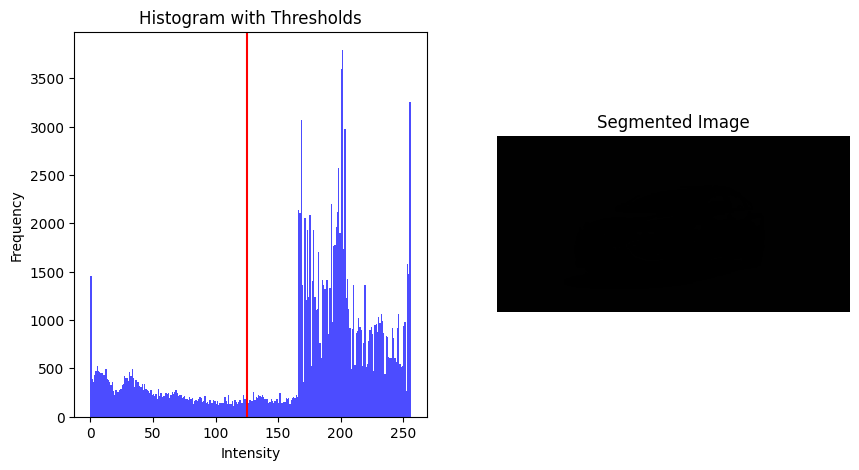

In [22]:
def multi_level_thresholding(image, initial_threshold, max_iterations=100, tolerance=1e-6):
    thresholds = [initial_threshold]

    for _ in range(max_iterations):
        # Segment the image based on the current threshold values
        segments = [image > threshold for threshold in thresholds]

        # Compute mean intensity for each segment
        mean_intensities = [np.mean(image[segment]) for segment in segments]

        # Update threshold values based on the midpoint between adjacent segments' mean intensities
        new_thresholds = [(mean_intensities[i] + mean_intensities[i + 1]) / 2 for i in range(len(segments) - 1)]

        # Check for convergence
        if np.allclose(thresholds, new_thresholds, atol=tolerance):
            break

        thresholds = new_thresholds

    return thresholds

# Perform multi-level thresholding
thresholds = multi_level_thresholding(image, initial_threshold)

# Display the final threshold values
print("Final Thresholds:", thresholds)


segmented_image = np.digitize(image, bins=thresholds)


# Plot histogram and thresholds
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(image.flatten(), bins=256, range=[0,256], color='b', alpha=0.7)
for thresh in thresholds:
    plt.axvline(thresh, color='r')
plt.title("Histogram with Thresholds")
plt.xlabel("Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title("Segmented Image")
plt.axis('off')

plt.show()
